# MF_Timestamp_Service(standalone setup)

## Timestamp Service Overview

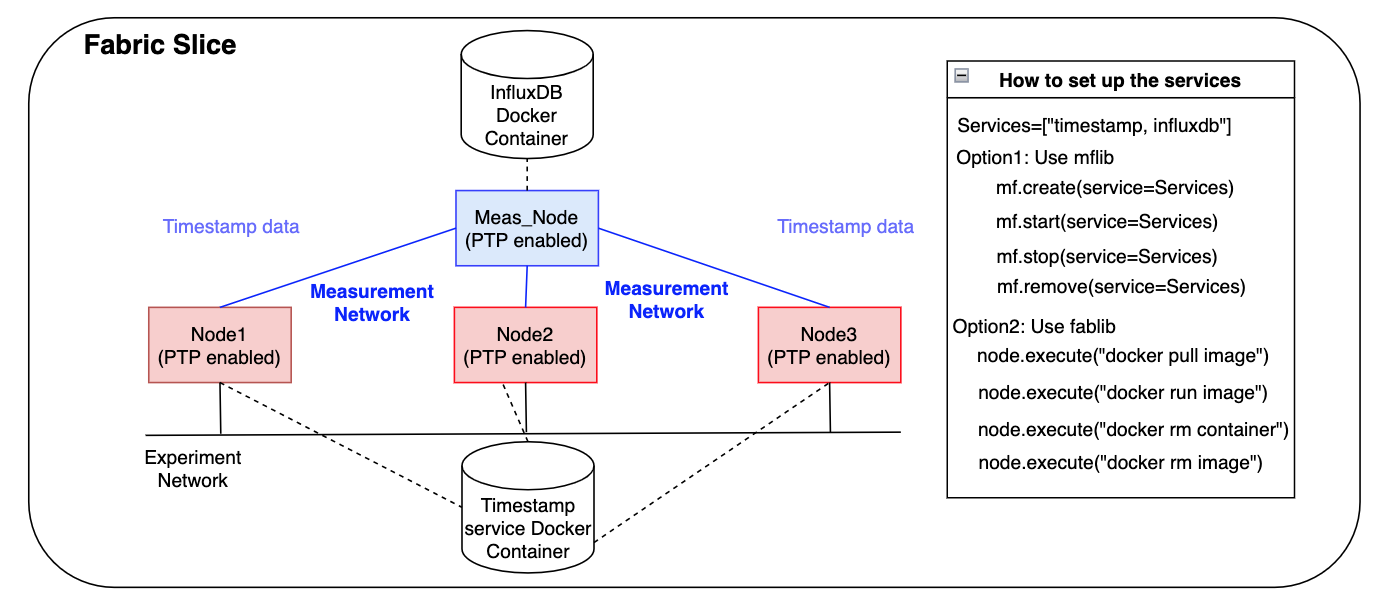

## Import

In [1]:
import json
import os
import traceback
import importlib
import mflib 
print(f"MFLib version  {mflib.__version__} " )
from mflib.mflib import MFLib
from mflib.mf_timestamp import mf_timestamp 
#importlib.reload(mf_timestamp)
from fabrictestbed_extensions.fablib.fablib import fablib
from fabrictestbed_extensions.fablib.fablib import FablibManager as fablib_manager

MFLib version  0.0.0b1 


## Slice info

In [2]:
# Change your slice name
slice_name="MyMonitoredSlice"
container_name="timestamp"
node1_name = 'Node1'
node2_name = 'Node2'
node3_name = 'Node3'

In [3]:
%%time
mf = MFLib(slice_name)

Inititializing slice "MyMonitoredSlice" for MeasurementFramework.
Found meas node as _meas_node at 2001:400:a100:3030:f816:3eff:fec8:ea0c
Bootstrap status indicates Slice Measurement Framework is ready.
CPU times: user 159 ms, sys: 22.7 ms, total: 181 ms
Wall time: 9.53 s


## Find the Measurement node and Experiment Nodes

In [4]:
meas_node_name = "_meas_node"
try:
    slice = fablib.get_slice(name=slice_name)
except Exception as e:
    print(f"Fail: {e}")
try:
    meas_node = slice.get_node(name=meas_node_name)
    node1 = slice.get_node(name=node1_name)
    node2 = slice.get_node(name=node2_name)
    node3 = slice.get_node(name=node3_name)
except Exception as e:
    print(f"Fail: {e}")

## Check whether Nodes are on PTP-capable sites

In [5]:
ptp_capable_sites=['STAR','MAX','MICH','MASS','UTAH','NCSA','UCSD','FIU','CLEM','CERN']
for node in [node1, node2, node3]:
    site=node.get_site()
    name=node.get_name()
    if (site in ptp_capable_sites):
        print (f"{name} on {site} is ptp capable")
    else:
        print (f"{name} on {site} is not ptp capable")

Node1 on MICH is ptp capable
Node2 on FIU is ptp capable
Node3 on CLEM is ptp capable


## Ensure PTP is running

In [6]:
node1.execute("ps -ef | grep phc2sys")
node2.execute("ps -ef | grep phc2sys")
node3.execute("ps -ef | grep phc2sys")

root       27491       1  0 Apr06 ?        00:00:20 /usr/sbin/phc2sys -u 8 -E linreg -O +0 -s /dev/ptp2 -c eth2
root       27635       1  0 Apr06 ?        00:00:20 /usr/sbin/phc2sys -u 8 -E linreg -O +0 -s /dev/ptp2 -c eth1
root       27779       1  0 Apr06 ?        00:00:09 /usr/sbin/phc2sys -u 8 -E linreg -O +0 -s /dev/ptp2 -c CLOCK_REALTIME
rocky      52661   52660  0 03:07 ?        00:00:00 bash -c ps -ef | grep phc2sys
rocky      52677   52661  0 03:07 ?        00:00:00 grep phc2sys
root       27937       1  0 Apr06 ?        00:00:20 /usr/sbin/phc2sys -u 8 -E linreg -O +0 -s /dev/ptp2 -c eth2
root       28093       1  0 Apr06 ?        00:00:20 /usr/sbin/phc2sys -u 8 -E linreg -O +0 -s /dev/ptp2 -c eth1
root       28249       1  0 Apr06 ?        00:00:09 /usr/sbin/phc2sys -u 8 -E linreg -O +0 -s /dev/ptp2 -c CLOCK_REALTIME
rocky      35947   35946  0 03:07 ?        00:00:00 bash -c ps -ef | grep phc2sys
rocky      35965   35947  0 03:07 ?        00:00:00 grep phc2sys
root       283

('root       28377       1  0 Apr06 ?        00:00:21 /usr/sbin/phc2sys -u 8 -E linreg -O +0 -s /dev/ptp2 -c eth2\nroot       28533       1  0 Apr06 ?        00:00:20 /usr/sbin/phc2sys -u 8 -E linreg -O +0 -s /dev/ptp2 -c eth1\nroot       28690       1  0 Apr06 ?        00:00:10 /usr/sbin/phc2sys -u 8 -E linreg -O +0 -s /dev/ptp2 -c CLOCK_REALTIME\nrocky      37260   37259  0 03:08 ?        00:00:00 bash -c ps -ef | grep phc2sys\nrocky      37278   37260  0 03:08 ?        00:00:00 grep phc2sys\n',
 '')

## Setup timestamp service on nodes

### Pull the timestamp docker image to nodes 

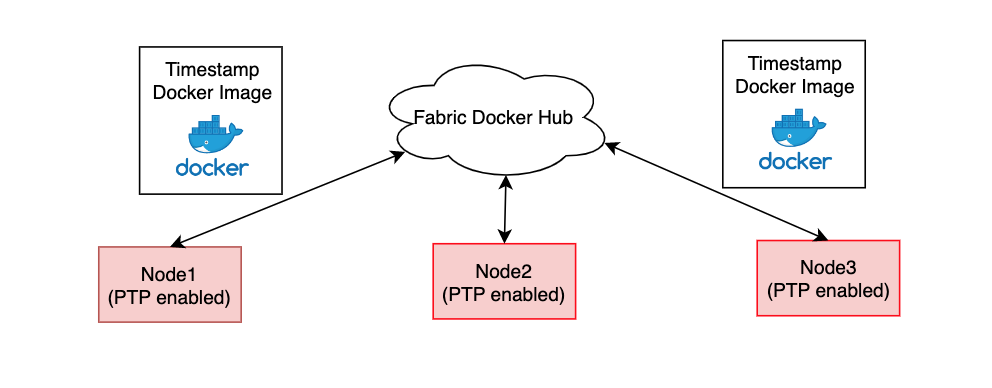

In [7]:
# Copies the timestamp Dockerfile from measurement node to each experiment node and builds the image
#mf.create(service="timestamp")

# Or alternatively pull the image from Fabric Docker Hub
node1.execute("sudo docker pull fabrictestbed/timestamp:0.1.0")
#node2.execute("sudo docker pull fabrictestbed/timestamp:0.1.0")
#node3.execute("sudo docker pull fabrictestbed/timestamp:0.1.0")

0.1.0: Pulling from fabrictestbed/timestamp
3689b8de819b: Pulling fs layer
af8cd5f36469: Pulling fs layer
eca77d094016: Pulling fs layer
4a172d0c6bce: Pulling fs layer
9b46341472c2: Pulling fs layer
2ad7780053af: Pulling fs layer
fa401c768bad: Pulling fs layer
97324bb4efee: Pulling fs layer
326ac34539da: Pulling fs layer
8ed5d76752cd: Pulling fs layer
4b2959912c0e: Pulling fs layer
154e3b2d0d68: Pulling fs layer
6c8126905b4c: Pulling fs layer
63d590cc25dd: Pulling fs layer
3eb5ca47524e: Pulling fs layer
98b65b033edc: Pulling fs layer
03efe2eb89fc: Pulling fs layer
bcbafac6648c: Pulling fs layer
2c1c2a5ee1b1: Pulling fs layer
45bf25e43aa3: Pulling fs layer
4a172d0c6bce: Waiting
9b46341472c2: Waiting
2ad7780053af: Waiting
fa401c768bad: Waiting
97324bb4efee: Waiting
326ac34539da: Waiting
8ed5d76752cd: Waiting
4b2959912c0e: Waiting
154e3b2d0d68: Waiting
6c8126905b4c: Waiting
63d590cc25dd: Waiting
3eb5ca47524e: Waiting
98b65b033edc: Waiting
03efe2eb89fc: Waiting
bcbafac6648c: Waiting
2c1c2a

('0.1.0: Pulling from fabrictestbed/timestamp\n3689b8de819b: Pulling fs layer\naf8cd5f36469: Pulling fs layer\neca77d094016: Pulling fs layer\n4a172d0c6bce: Pulling fs layer\n9b46341472c2: Pulling fs layer\n2ad7780053af: Pulling fs layer\nfa401c768bad: Pulling fs layer\n97324bb4efee: Pulling fs layer\n326ac34539da: Pulling fs layer\n8ed5d76752cd: Pulling fs layer\n4b2959912c0e: Pulling fs layer\n154e3b2d0d68: Pulling fs layer\n6c8126905b4c: Pulling fs layer\n63d590cc25dd: Pulling fs layer\n3eb5ca47524e: Pulling fs layer\n98b65b033edc: Pulling fs layer\n03efe2eb89fc: Pulling fs layer\nbcbafac6648c: Pulling fs layer\n2c1c2a5ee1b1: Pulling fs layer\n45bf25e43aa3: Pulling fs layer\n4a172d0c6bce: Waiting\n9b46341472c2: Waiting\n2ad7780053af: Waiting\nfa401c768bad: Waiting\n97324bb4efee: Waiting\n326ac34539da: Waiting\n8ed5d76752cd: Waiting\n4b2959912c0e: Waiting\n154e3b2d0d68: Waiting\n6c8126905b4c: Waiting\n63d590cc25dd: Waiting\n3eb5ca47524e: Waiting\n98b65b033edc: Waiting\n03efe2eb89fc: 

### Check the image on Node1

In [8]:
node1.execute("sudo docker image ls")

REPOSITORY                TAG       IMAGE ID       CREATED       SIZE
fabrictestbed/timestamp   0.1.0     fd78e3464897   2 weeks ago   709MB


('REPOSITORY                TAG       IMAGE ID       CREATED       SIZE\nfabrictestbed/timestamp   0.1.0     fd78e3464897   2 weeks ago   709MB\n',
 '')

### Run the timestamp docker image as a container on the experiment node

In [9]:
# Runs the built image as Docker Container  
#mf.start(services=["timestamp",])

# Or alternativly, 
timestamp_bind_mount_volume = "/home/rocky/timestamp/"
cmd = f'''
      sudo docker run -dit \
      -v {timestamp_bind_mount_volume}:/root/services/timestamp/output_files/ \
      --pid=host --network=host --privileged \
      --name timestamp fabrictestbed/timestamp:0.1.0
      '''
node1.execute(cmd)
#node2.execute(cmd)
#node3.execute(cmd)

a155bf5cab598457313e2d4fdb2a0099a76c2f23b437c909f29d9cb37cb05db8


('a155bf5cab598457313e2d4fdb2a0099a76c2f23b437c909f29d9cb37cb05db8\n', '')

### Check on Node1 if timestamp docker container is running

In [10]:
command = f"sudo docker ps"
stdout, stderr= node1.execute(command)

CONTAINER ID   IMAGE                           COMMAND     CREATED         STATUS         PORTS     NAMES
a155bf5cab59   fabrictestbed/timestamp:0.1.0   "python3"   4 seconds ago   Up 3 seconds             timestamp


## Create the object

In [11]:
ts = mf_timestamp(slice_name=slice_name, container_name=container_name)

In [12]:
packet_test_name="packet-test"
event_test_name="event-test"

## Record timestamp for packets
### This method will trigger tcpdump to record packets and write to file

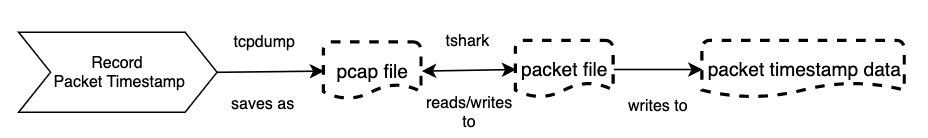

In [13]:
# Need to Check the interface ens/eth on that node and pass as a parameter
# Prepare to run iperf from meas_node to this experiment node in the terminal 
# e.g, On node1: sudo iperf3 -s    On Node2: sudo iperf -c {node1_IP_address} -t 10 -b 1G
ts.record_packet_timestamp(node=node1_name,name=packet_test_name, interface="eth2",ipversion="6",
                           protocol="tcp", duration="10", verbose=True)

The docker command is: sudo docker exec -i timestamp python3 /root/services/timestamp/service_files/timestamptool.py record packet -n packet-test -i eth2 -ipv 6 -proto tcp -durn 10  -v
{'action': 'record', 'config_file_path': '/home/mfuser/services/timestamp/config_file/timestamp.conf', 'type': 'packet', 'name': 'packet-test', 'interface': 'eth2', 'ipversion': '6', 'protocol': 'tcp', 'duration': 10, 'port': None, 'host': None, 'verbose': True}
Recording packet...
Starting Tcpdump......

The tcpdump command is: sudo timeout 10 tcpdump -v -j adapter_unsynced --time-stamp-precision nano -i eth2 -w /root/services/timestamp/pcap_file/tcpdump.pcap tcp  

 tcpdump: listening on eth2, link-type EN10MB (Ethernet), capture size 262144 bytes
  Got 277 Got 790 Got 1302 Got 1799 Got 2304 Got 2868 Got 3457 Got 4054 Got 4656 5212 packets captured
5220 packets received by filter
0 packets dropped by kernel
 Running Tshark to read to pcap file......

The tshark command is: sudo tshark -T ek -r /root/se

### Get the recorded packet timestamp from local file

In [14]:
# May run into IOPub data rate exceeded error if you have large data
packet_records= ts.get_packet_timestamp(node=node1_name, name=packet_test_name)

[
  {
    "name": "packet-test",
    "timestamp": "2023-04-11T03:09:23.786597325Z",
    "src_ip": "2602:fcfb:10:3::2",
    "dst_ip": "2602:fcfb:6:2:bf59:7f84:4e08:9c37",
    "protocol": "eth:ethertype:ipv6:tcp",
    "src_port": 39132,
    "dst_port": 5201
  },
  {
    "name": "packet-test",
    "timestamp": "2023-04-11T03:09:23.786670862Z",
    "src_ip": "2602:fcfb:6:2:bf59:7f84:4e08:9c37",
    "dst_ip": "2602:fcfb:10:3::2",
    "protocol": "eth:ethertype:ipv6:tcp",
    "src_port": 5201,
    "dst_port": 39132
  },
  {
    "name": "packet-test",
    "timestamp": "2023-04-11T03:09:23.822339608Z",
    "src_ip": "2602:fcfb:10:3::2",
    "dst_ip": "2602:fcfb:6:2:bf59:7f84:4e08:9c37",
    "protocol": "eth:ethertype:ipv6:tcp",
    "src_port": 39132,
    "dst_port": 5201
  },
  {
    "name": "packet-test",
    "timestamp": "2023-04-11T03:09:23.822380082Z",
    "src_ip": "2602:fcfb:10:3::2",
    "dst_ip": "2602:fcfb:6:2:bf59:7f84:4e08:9c37",
    "protocol": "eth:ethertype:ipv6:tcp:data",
    "s

### Download the packet timestamp data file from node1

In [15]:
file_download_path = "/home/fabric/work/packet_timestamp.json" 
ts.download_timestamp_file(node=node1_name, data_type="packet_timestamp",
                           local_file=file_download_path,
                           bind_mount_volume=timestamp_bind_mount_volume)

### Inspect the data format from the downloaded file

In [16]:
# A list of json objects
with open(file_download_path, 'r') as f:
    result = json.load(f)
print (result[0])

{'name': 'packet-test', 'timestamp': '2023-04-11T03:09:23.786597325Z', 'src_ip': '2602:fcfb:10:3::2', 'dst_ip': '2602:fcfb:6:2:bf59:7f84:4e08:9c37', 'protocol': 'eth:ethertype:ipv6:tcp', 'src_port': 39132, 'dst_port': 5201}


### Local Data Visualization using matplotlib 

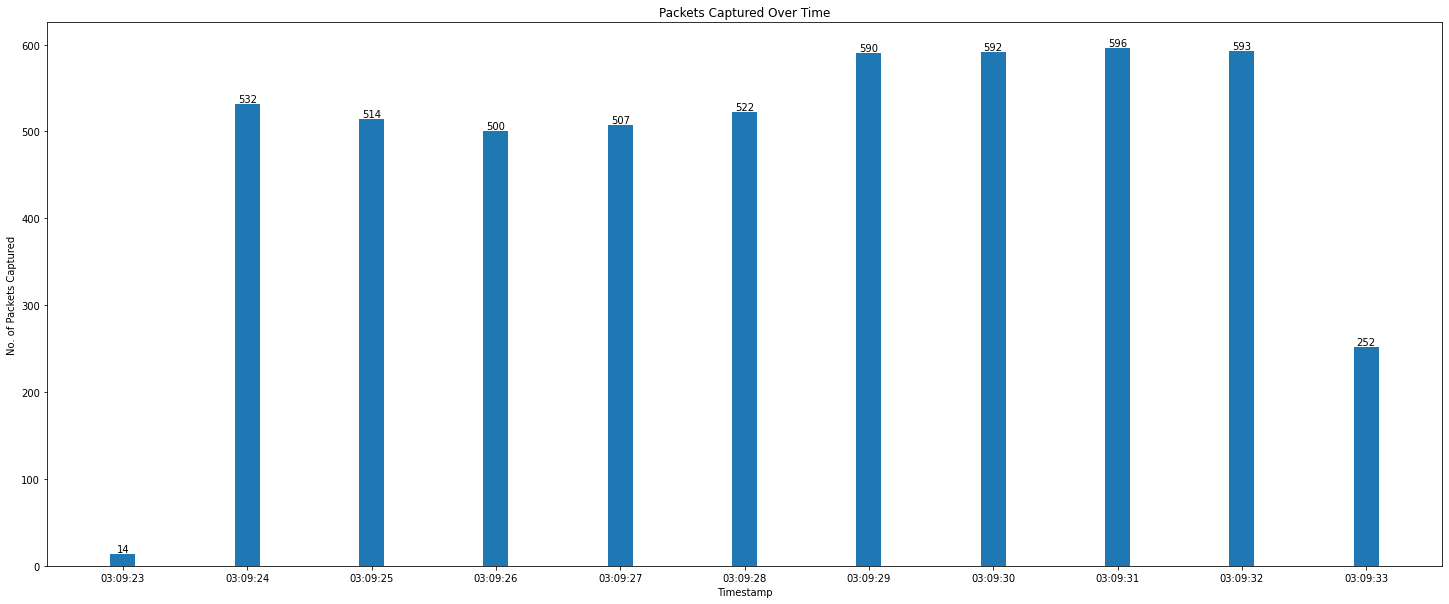

In [17]:
ts.plot_packet_timestamp(json_obj=result)

### Record timestamp for events

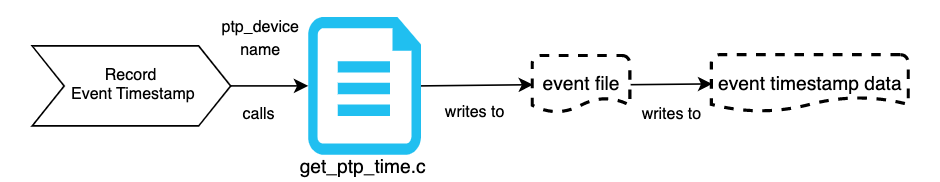

In [18]:
ts.record_event_timestamp(node=node1_name,name=event_test_name,event="'ram usage above 80 percent'", verbose=True)

The docker command is: sudo docker exec -i timestamp python3 /root/services/timestamp/service_files/timestamptool.py record event -n event-test -event 'ram usage above 80 percent'  -v
{'action': 'record', 'config_file_path': '/home/mfuser/services/timestamp/config_file/timestamp.conf', 'type': 'event', 'name': 'event-test', 'event': 'ram usage above 80 percent', 'description': None, 'verbose': True}
Recording event...
Writing event data to /root/services/timestamp/output_files/event.json
Calling C routine to get ptp time from device /dev/ptp2
Processing event timestamp......


### Get the recorded event timestamp

In [19]:
event_records=ts.get_event_timestamp(node=node1_name,name=event_test_name)

[
  {
    "timestamp": "2023-04-11T03:12:17.105973804Z",
    "name": "event-test",
    "event": "ram usage above 80 percent",
    "description": "none"
  }
]


## Setup influxdb service on measurement node

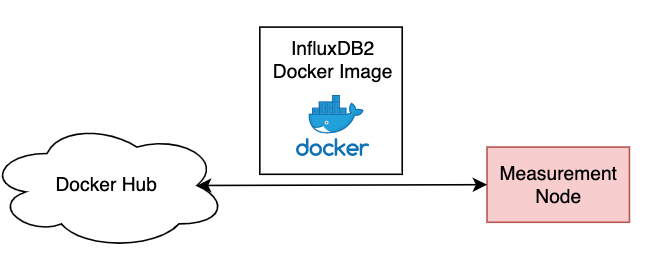

In [20]:
# Pulls the influxdb 2.0 docker image on measurement node
#mf.create(service="influxdb")

# Or alternatively,
meas_node.execute("sudo docker pull influxdb:2.0")

2.0: Pulling from library/influxdb
982cba7e471c: Pulling fs layer
b02d86f59850: Pulling fs layer
8b047e8f2e47: Pulling fs layer
dc44b41d3b54: Pulling fs layer
bcd83ba9d903: Pulling fs layer
2978b95b0d4a: Pulling fs layer
d8202613e12d: Pulling fs layer
08d3416f8db9: Pulling fs layer
6315db684033: Pulling fs layer
2978b95b0d4a: Waiting
d8202613e12d: Waiting
08d3416f8db9: Waiting
6315db684033: Waiting
dc44b41d3b54: Waiting
bcd83ba9d903: Waiting
b02d86f59850: Verifying Checksum
b02d86f59850: Download complete
8b047e8f2e47: Verifying Checksum
8b047e8f2e47: Download complete
982cba7e471c: Verifying Checksum
982cba7e471c: Download complete
bcd83ba9d903: Verifying Checksum
bcd83ba9d903: Download complete
dc44b41d3b54: Verifying Checksum
dc44b41d3b54: Download complete
08d3416f8db9: Download complete
d8202613e12d: Verifying Checksum
d8202613e12d: Download complete
982cba7e471c: Pull complete
2978b95b0d4a: Verifying Checksum
2978b95b0d4a: Download complete
b02d86f59850: Pull complete
8b047e8f2e4

('2.0: Pulling from library/influxdb\n982cba7e471c: Pulling fs layer\nb02d86f59850: Pulling fs layer\n8b047e8f2e47: Pulling fs layer\ndc44b41d3b54: Pulling fs layer\nbcd83ba9d903: Pulling fs layer\n2978b95b0d4a: Pulling fs layer\nd8202613e12d: Pulling fs layer\n08d3416f8db9: Pulling fs layer\n6315db684033: Pulling fs layer\n2978b95b0d4a: Waiting\nd8202613e12d: Waiting\n08d3416f8db9: Waiting\n6315db684033: Waiting\ndc44b41d3b54: Waiting\nbcd83ba9d903: Waiting\nb02d86f59850: Verifying Checksum\nb02d86f59850: Download complete\n8b047e8f2e47: Verifying Checksum\n8b047e8f2e47: Download complete\n982cba7e471c: Verifying Checksum\n982cba7e471c: Download complete\nbcd83ba9d903: Verifying Checksum\nbcd83ba9d903: Download complete\ndc44b41d3b54: Verifying Checksum\ndc44b41d3b54: Download complete\n08d3416f8db9: Download complete\nd8202613e12d: Verifying Checksum\nd8202613e12d: Download complete\n982cba7e471c: Pull complete\n2978b95b0d4a: Verifying Checksum\n2978b95b0d4a: Download complete\nb02d8

In [21]:
meas_node.execute("sudo docker image ls")

REPOSITORY   TAG       IMAGE ID       CREATED         SIZE
influxdb     2.0       6e977ef79a26   10 months ago   342MB


('REPOSITORY   TAG       IMAGE ID       CREATED         SIZE\ninfluxdb     2.0       6e977ef79a26   10 months ago   342MB\n',
 '')

### Run influxdb in the docker container on measurement node

In [22]:
# Runs the pulled image as a container
#mf.start(services=["influxdb",])

# Or alternatively,
influxdb_bind_mount_volume="/home/mfuser/influxdb"
cmd = f'''
      sudo docker run --privileged -d \
      -v {influxdb_bind_mount_volume}:/var/lib/influxdb2 \
      -e DOCKER_INFLUXDB_INIT_MODE=setup \
      -e DOCKER_INFLUXDB_INIT_USERNAME=my-user \
      -e DOCKER_INFLUXDB_INIT_PASSWORD=my-password \
      -e DOCKER_INFLUXDB_INIT_ORG=my-org \
      -e DOCKER_INFLUXDB_INIT_BUCKET=my-bucket \
      --network=host --privileged \
      --name influxdb influxdb:2.0
      '''
meas_node.execute(cmd)

7e29ada6c5081ed66cc9757bd3e01f17772bd26ba3d02740db1bb58d65b5437a


('7e29ada6c5081ed66cc9757bd3e01f17772bd26ba3d02740db1bb58d65b5437a\n', '')

### Check influxdb docker container on measurement node 

In [23]:
command = f"sudo docker ps"
stdout, stderr= meas_node.execute(command)

CONTAINER ID   IMAGE          COMMAND                  CREATED         STATUS         PORTS     NAMES
7e29ada6c508   influxdb:2.0   "/entrypoint.sh infl…"   6 seconds ago   Up 6 seconds             influxdb


## Get influxdb info from the measurement node

### Open InfluxDB port

In [24]:
command = f"sudo ufw allow 8086"
stdout, stderr= meas_node.execute(command)

Skipping adding existing rule
Skipping adding existing rule (v6)


### List influxdb info

In [25]:
print ("List buckets")
command = f"sudo docker exec influxdb influx bucket list -o my-org"
stdout, stderr= meas_node.execute(command)

print ("\nList orgs")
command = f"sudo docker exec influxdb influx org list --json"
stdout, stderr= meas_node.execute(command)
org_id = str(json.loads(stdout)[0]["id"])

print ("\nList tokens")
command = f"sudo docker exec influxdb influx auth list --json"
stdout, stderr= meas_node.execute(command)

List buckets
ID			Name		Retention	Shard group duration	Organization ID
4c759b4a17cd8fce	_monitoring	168h0m0s	24h0m0s			4a11abe46a3c8480
0b4717399336712a	_tasks		72h0m0s		24h0m0s			4a11abe46a3c8480
2f8de623c6ffa993	my-bucket	infinite	168h0m0s		4a11abe46a3c8480

List orgs
[
	{
		"id": "4a11abe46a3c8480",
		"name": "my-org",
		"description": "",
		"createdAt": "2023-04-11T03:13:47.214548501Z",
		"updatedAt": "2023-04-11T03:13:47.214548692Z"
	}
]

List tokens
[
	{
		"id": "0b0792e1b4efa000",
		"description": "my-user's Token",
		"token": "I2PJqWATDpxiiI5-NEOiZkHy7nD0UPCIywFVil4YPynSdVUKMc6iePtVBY2B7ulAnPkdFXh45rRIGXMV3eC5JA==",
		"status": "active",
		"userName": "my-user",
		"userID": "0b0792e1a1efa000",
		"permissions": [
			"read:authorizations",
			"write:authorizations",
			"read:buckets",
			"write:buckets",
			"read:dashboards",
			"write:dashboards",
			"read:orgs",
			"write:orgs",
			"read:sources",
			"write:sources",
			"read:tasks",
			"write:tasks",
			"read:telegrafs",
			"w

## Upload data to influxdb

### Get influx info

In [26]:
token = str(json.loads(stdout)[0]["token"])
bucket = "my-bucket"
org="my-org"  

### Upload packet and event data to influxdb

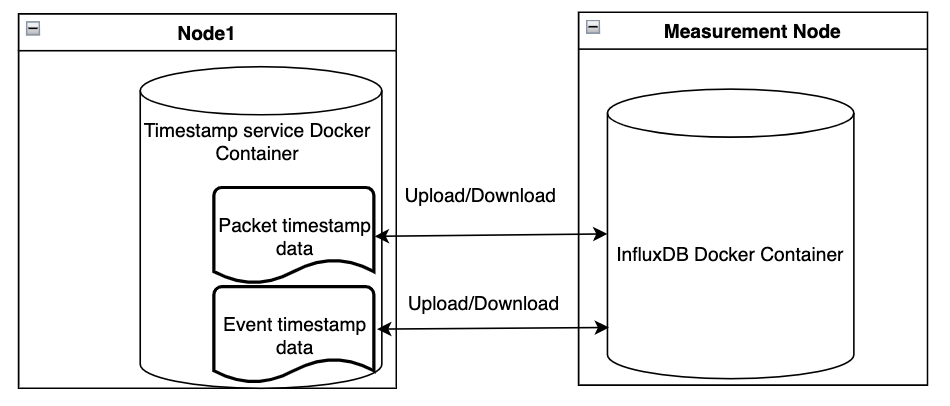

In [27]:
ts.upload_timestamp_to_influxdb(node=node1_name, data_type="packet_data", bucket=bucket, org=org, token=token)

The docker command is: sudo docker exec -i timestamp python3 /root/services/timestamp/service_files/influxdb_manager.py upload packet_data -b my-bucket -o my-org -t I2PJqWATDpxiiI5-NEOiZkHy7nD0UPCIywFVil4YPynSdVUKMc6iePtVBY2B7ulAnPkdFXh45rRIGXMV3eC5JA==


In [28]:
ts.upload_timestamp_to_influxdb(node=node1_name, data_type="event_data", bucket=bucket, org=org, token=token)

The docker command is: sudo docker exec -i timestamp python3 /root/services/timestamp/service_files/influxdb_manager.py upload event_data -b my-bucket -o my-org -t I2PJqWATDpxiiI5-NEOiZkHy7nD0UPCIywFVil4YPynSdVUKMc6iePtVBY2B7ulAnPkdFXh45rRIGXMV3eC5JA==


## If you want to see the Json output

### Download packet data from influxdb

In [29]:
# May run into IOPub data rate exceeded error if you have large data
ts.download_timestamp_from_influxdb(node=node1_name, data_type="packet_data", 
                                    bucket=bucket, org=org, token=token, name=packet_test_name)

[
  {
    "result": "_result",
    "table": 0,
    "_start": "1970-01-01T00:00:00+00:00",
    "_stop": "2023-04-11T03:16:27.031896314+00:00",
    "_time": "2023-04-11T03:09:23.786670862+00:00",
    "_value": 1,
    "_field": "count",
    "_measurement": "node1.novalocal-packet-timestamp",
    "dst_ip": "2602:fcfb:10:3::2",
    "dst_port": "39132",
    "name": "packet-test",
    "protocol": "eth:ethertype:ipv6:tcp",
    "src_ip": "2602:fcfb:6:2:bf59:7f84:4e08:9c37",
    "src_port": "5201"
  },
  {
    "result": "_result",
    "table": 0,
    "_start": "1970-01-01T00:00:00+00:00",
    "_stop": "2023-04-11T03:16:27.031896314+00:00",
    "_time": "2023-04-11T03:09:23.822392692+00:00",
    "_value": 1,
    "_field": "count",
    "_measurement": "node1.novalocal-packet-timestamp",
    "dst_ip": "2602:fcfb:10:3::2",
    "dst_port": "39132",
    "name": "packet-test",
    "protocol": "eth:ethertype:ipv6:tcp",
    "src_ip": "2602:fcfb:6:2:bf59:7f84:4e08:9c37",
    "src_port": "5201"
  },
  {
  

### Generate a .csv file based on query on the Influxdb node

In [30]:
ts.generate_csv_on_influxdb_node(data_node=node1_name, name=packet_test_name, data_type="packet_timestamp", 
                                    bucket=bucket, org=org, token=token,influxdb_node="_meas_node")

   % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1205k    0 1205k  100   194  51.1M   8434 --:--:-- --:--:-- --:--:-- 51.1M
 

### Download the .csv file from influxdb

In [31]:
local_file=f"/home/fabric/work/influxdb_{node1_name}_packet_timestamp.csv"
ts.download_file_from_influxdb(data_node=node1_name, data_type="packet_timestamp", influxdb_node="_meas_node",
                               local_file=local_file)
#meas_node.download_file(local_file_path="/home/fabric/work/test.csv", 
                        #remote_file_path="/tmp/node1_packet_timestamp.csv")

### Inspect the data format from the .csv file

In [33]:
import pandas as pd
df = pd.read_csv (local_file)
print(df.iloc[0])

Unnamed: 0                                    NaN
result                                    _result
table                                           0
_start                       1970-01-01T00:00:00Z
_stop              2023-04-11T03:17:26.169320288Z
_time              2023-04-11T03:09:23.786670862Z
_value                                          1
_field                                      count
_measurement     node1.novalocal-packet-timestamp
dst_ip                          2602:fcfb:10:3::2
dst_port                                    39132
name                                  packet-test
protocol                   eth:ethertype:ipv6:tcp
src_ip          2602:fcfb:6:2:bf59:7f84:4e08:9c37
src_port                                     5201
Name: 0, dtype: object


### Download event timestamp data

In [34]:
ts.download_timestamp_from_influxdb(node=node1_name, data_type="event_data", 
                                    bucket=bucket, org=org, token=token, name=event_test_name)

[
  {
    "result": "_result",
    "table": 0,
    "_start": "1970-01-01T00:00:00+00:00",
    "_stop": "2023-04-11T03:24:24.121173918+00:00",
    "_time": "2023-04-11T03:12:17.105973804+00:00",
    "_value": 1,
    "_field": "count",
    "_measurement": "node1.novalocal-event-timestamp",
    "description": "none",
    "event": "ram usage above 80 percent",
    "name": "event-test"
  }
]


## Visualize the influxdb web UI

In [35]:
# Set up ssh tunneling and provide the local port number
# ssh -L 9999:localhost:8086 -F ~/.ssh/fabric_ssh_config -i ~/.ssh/fabric_slice_key ubuntu@meas_node_ip 
port="9999"
URL=f"http://localhost:{port}/orgs/{org_id}/data-explorer?bucket={bucket}"
print (URL)

http://localhost:9999/orgs/4a11abe46a3c8480/data-explorer?bucket=my-bucket


In [36]:
# Username: my-user password: my-password
from IPython.display import IFrame
IFrame(URL, width=1200, height=1000)

### Upload Custom Dashboard

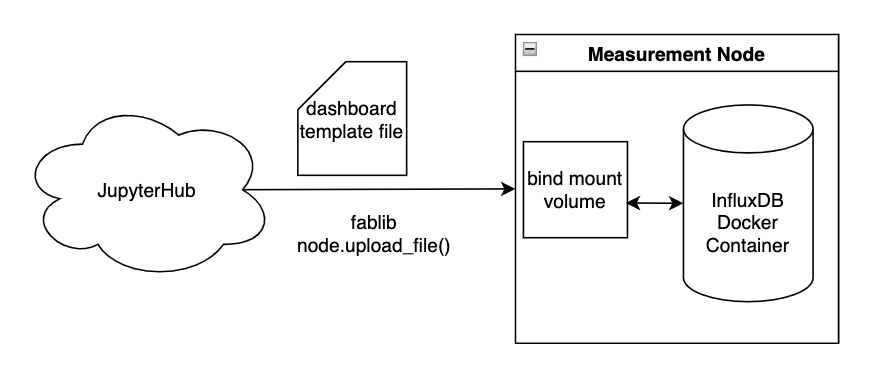

In [37]:
# Use mf_timestamp
cwd = os.getcwd()
dashboard_file_relative_path = "dashboard_examples/influxdb/influxdb_timestamp_dashboard.yml"
dashboard_file_real_path = os.path.join(cwd, dashboard_file_relative_path)
ts.deploy_influxdb_dashboard(dashboard_file=dashboard_file_real_path)

# Or
# Upload the dashboard file to the directory on meas_node that binds mount on influxdb container
#meas_node.upload_file(local_file_path=dashboard_file_real_path, remote_file_path="/home/mfuser/influxdb/dashboard.yml")

# Apply the template in influxdb 
#command = f"sudo docker exec -i influxdb influx apply --skip-verify --file /var/lib/influxdb2/dashboard.yml"
#stdout, stderr= meas_node.execute(command)

BUCKETS    +add | -remove | unchanged
+-----+-------------------------+------------------+---------------+------------------+-------------+
| +/- |      METADATA NAME      |        ID        | RESOURCE NAME | RETENTION PERIOD | DESCRIPTION |
+-----+-------------------------+------------------+---------------+------------------+-------------+
|     | dangerous-bouman-ee4001 | 2f8de623c6ffa993 | my-bucket     | 0s               |             |
+-----+-------------------------+------------------+---------------+------------------+-------------+
|                                                                         TOTAL       |      1      |
+-----+-------------------------+------------------+---------------+------------------+-------------+

DASHBOARDS    +add | -remove | unchanged
+-----+---------------------------------+----+---------------------------------+-------------+------------+
| +/- |          METADATA NAME          | ID |          RESOURCE NAME          | DESCRIPTION | NUM

## Stop the services 

In [38]:
# Use mflib to stop the timestamp container
#mf.stop(services=["timestamp",])

# Or alternatively,
stdout=node1.execute("sudo docker ps -aqf 'name=timestamp'", quiet=True)
timestamp_container_id=stdout[0]
stdout,stderr= node1.execute(f"sudo docker container stop {timestamp_container_id}", quiet=True)

In [39]:
# Use mflib to stop the influxdb container
#mf.stop(services=["influxdb",])

# Or alternatively,
stdout=meas_node.execute("sudo docker ps -aqf 'name=influxdb'", quiet=True)
influxdb_container_id=stdout[0]
stdout,stderr= meas_node.execute(f"sudo docker container stop {influxdb_container_id}", quiet=True)


## Remove the services

In [40]:
# Use mflib to stop the timestamp container
#mf.remove(services=["timestamp",])

# Or alternatively,
stdout,stderr= node1.execute(f"sudo docker rm -v timestamp", quiet=True)
# Remove the timestamp docker image
stdout,stderr= node1.execute("sudo docker rmi -f fabrictestbed/timestamp:0.1.0")
# Remove the bind mount volume
stdout,stderr= node1.execute(f"sudo rm -rf {timestamp_bind_mount_volume}")

Untagged: fabrictestbed/timestamp:0.1.0
Untagged: fabrictestbed/timestamp@sha256:2cfb80e18eda9ca2a695f6f02aa48046b6f9349f3653d4adecba2f205c72ab85
Deleted: sha256:fd78e346489720cdcd9964cf747f8b98684a8c1dc627e11ac14dd67ac8d8008d
Deleted: sha256:a7b777e7e9bec0c8bcf4c536dc895a91723e41f2c24cd90e5a115e09e1abcbee
Deleted: sha256:5eee7917e59f5c044f55f6a23fe6aeae45c922bfccc8688faafed86740d84dfb
Deleted: sha256:6ae2cb51650694f42eba016e4f16aed5cb86057c7669f8a5b3570b47ced6c43a
Deleted: sha256:80b69050ccee866983b86b4a31788669385ba464d7f49621b546fb2e0d6ee70f
Deleted: sha256:d7a78a4a09150cbd225174866a3eefc7dae36bcccf671c74e4c7b1b0bb94743a
Deleted: sha256:9d6c65aabb7638f46abd6f6eb1066a23d83ad231e06a95ef802f45d02ecaaa45
Deleted: sha256:30f6dd5eefddeb341ff64072d9e492bbfb562b7aea0bee8bb1c92b0f7be5c165
Deleted: sha256:99324cac138f428aa484e9e716a41e60805ec3cf62598742e6b2a7c135c155dc
Deleted: sha256:9c0e50f4e1dab25e62c6654115d1dc0158eea82041578c561a9cb38c41460c96
Deleted: sha256:602bc85196eb396cfd7f1d7a6510

In [41]:
# Use mflib to stop the influxdb container
#mf.remove(services=["influxdb",])

# Or alternatively,
stdout,stderr= meas_node.execute(f"sudo docker rm -v influxdb", quiet=True)
# Remove the influxdb docker image
stdout,stderr= meas_node.execute("sudo docker rmi -f influxdb:2.0")
# Remove the bind mount volume
stdout,stderr= meas_node.execute(f"sudo rm -rf {influxdb_bind_mount_volume}")

Untagged: influxdb:2.0
Untagged: influxdb@sha256:6dd9d3894e92c31ba25c59736d00871b46b960e40e65658bd8bd62825a53f88c
Deleted: sha256:6e977ef79a26bbd4062b6e3e9d2a5e21ac040d59082b40e27bdb458529cd27fa
Deleted: sha256:8695736166b30530ae2f912a737c07c523f94d47c5e3709382ea5a9d2bd85a0e
Deleted: sha256:fd9ee7df72cf747fa1204202c869b9fe83defb8b5a1f887175e3c2657392d0a1
Deleted: sha256:e00faa5751adaa657ec6e1eb847b0a4264151b1d8f9b964f5a2a1b12f4bd559a
Deleted: sha256:2767ac5981828f1d7423588cc13b6a50ff529586c900bffe901937066f5b801f
Deleted: sha256:c8905ff6400c6ee3d83b990d45c83a4a1c552c444c4c73a59ad7b9d3ec0f3166
Deleted: sha256:eaad238db264ae45e2201313a3b5985084378ec4ab09b6c4e60e49b2f612c3d7
Deleted: sha256:fc658d63731eb9f823ee79c77e58c82c57d05de37ea057c09e742bbfddd78fdc
Deleted: sha256:ff1412a397b6e5e2c13675ed792cd08d4acfebc4ae30d395e49da9d9833563c2
Deleted: sha256:f14da82c36e2e3bf6a7aaf7b88aae73135408f79738e5be67a1c8a6d7f6590d3


In [42]:
stdout,stderr= node1.execute("sudo docker ps -a")
stdout,stderr= node1.execute("sudo docker image ls")

CONTAINER ID   IMAGE     COMMAND   CREATED   STATUS    PORTS     NAMES
REPOSITORY   TAG       IMAGE ID   CREATED   SIZE


In [43]:
stdout,stderr= meas_node.execute("sudo docker ps -a")
stdout,stderr= meas_node.execute("sudo docker image ls")

CONTAINER ID   IMAGE     COMMAND   CREATED   STATUS    PORTS     NAMES
REPOSITORY   TAG       IMAGE ID   CREATED   SIZE
